In [1]:
library(tidyverse)
library(cowplot)

# Custom package
library(rutils)

-- Attaching packages ------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [3]:
text_size <- 16
label_text_size <- 16
small_text_size <- 16
family <- "ArialMT"
dpi <- 320
fig1_ht <- 4.5
fig1_wd <- 6

In [4]:
vplot_figs <- list()
for (idx in 1:3) {
    vplot_figs[[projects[idx]]] <- load(paste0(dirs$figures_dir, "/saved_obj/", unified_dsets[idx], "_vplots.RData"))
}
vplot_figs <- Reduce(c, vplot_figs)
# vplot_figs <- c(CESC_all_gene_vplot, CESC_mat_gene_vplot, UCS_all_gene_vplot, UCS_mat_gene_vplot, UCEC_all_gene_vplot, UCEC_mat_gene_vplot)

In [5]:
vplot_figs

[1] "CESC_all_gene_vplot" "CESC_mat_gene_vplot" "UCS_all_gene_vplot" 
[4] "UCS_mat_gene_vplot"  "UCEC_all_gene_vplot" "UCEC_mat_gene_vplot"

In [6]:
hide_legend <- function(plt) {
    plt + theme(legend.position="none")
}

hide_axis_title <- function(plt, axis = "x") {
    if (axis == "x") {
        plt <- plt + theme(axis.title.x = element_blank())
    }
    else if (axis == "y") {
        plt <- plt + theme(axis.title.y = element_blank())
    }
    plt
}

set_breaks <- function(plt, lims, break_seq, axis = "y") {
    if (axis == "x") {
        plt <- plt + scale_x_continuous(limits = lims, breaks = break_seq)
    }
    else if (axis == "y") {
        plt <- plt + scale_y_continuous(limits = lims, breaks = break_seq)
    }
    plt
}

set_margins <- function(plt, margins = c(0, 0, 0, 0)) {
    plt + theme(plot.margin = unit(margins, "cm"))
}

resize_text <- function(plt, text_size = small_text_size) {
    plt + theme(
        text = element_text(size = text_size)
    )
}

Warning message:
"Removed 1 rows containing missing values (geom_point)."


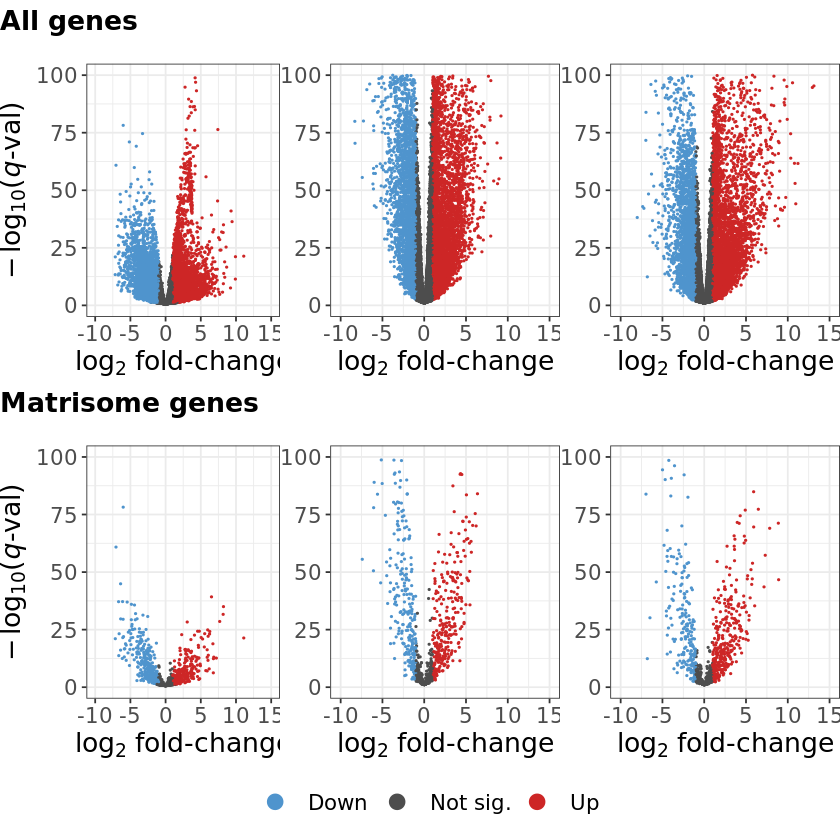

In [7]:
vplot_list <- c(
    mget("CESC_all_gene_vplot"),
#         purrr::map(function(p) { hide_axis_title(p, "x") }),
    mget(c("UCEC_all_gene_vplot", "UCS_all_gene_vplot")) %>%
        purrr::map(function(p) { hide_axis_title(p, "y") }),
    mget("CESC_mat_gene_vplot"),
    mget(c("UCEC_mat_gene_vplot", "UCS_mat_gene_vplot")) %>%
        purrr::map(function(p) { hide_axis_title(p, "y") })
) %>% 
    purrr::map(hide_legend) %>%
    purrr::map(function(p) { set_breaks(p, c(0, 100), seq(0, 100, 25), axis = "y") }) %>%
    purrr::map(function(p) { set_breaks(p, c(-10, 15), seq(-10, 15, 5), axis = "x") }) %>%
#     purrr::map(function(p) { set_margins(p, c(0, 0, 0, 0.25)) })
    purrr::map(function(p) { set_margins(p, c(0, 0, 0, 0)) }) %>%
    purrr::map(function(p) { resize_text(p, text_size = text_size) })


all_vplots_grid <- plot_grid(
    vplot_list$CESC_all_gene_vplot, vplot_list$UCEC_all_gene_vplot, vplot_list$UCS_all_gene_vplot,
    ncol = 3
)

# all_vplots_grid

lab_all_vplots_gird <- plot_grid(
    plot_grid(NULL, labels = c("All genes"), label_fontfamily = family, label_size = label_text_size, label_fontface = "bold", hjust = 0),
    all_vplots_grid,
    nrow = 2,
    align = "vh",
    rel_heights = c(0.2, 1)
)

# lab_all_vplots_gird

mat_vplots_grid <- plot_grid(
    vplot_list$CESC_mat_gene_vplot, vplot_list$UCEC_mat_gene_vplot, vplot_list$UCS_mat_gene_vplot,
    ncol = 3
)

# mat_vplots_grid

lab_mat_vplots_gird <- plot_grid(
    plot_grid(NULL, labels = c("Matrisome genes"), label_fontfamily = family, label_size = label_text_size, label_fontface = "bold", hjust = 0),
    mat_vplots_grid,
    nrow = 2,
    align = "vh",
    rel_heights = c(0.2, 1)
)

# lab_mat_vplots_gird

vplot_legend <- get_legend(
    CESC_all_gene_vplot + theme(legend.position="bottom", legend.spacing.x = unit(0.4, 'cm'), text = element_text(size = text_size))
)

vplot_grid <- plot_grid(
    lab_all_vplots_gird,
    lab_mat_vplots_gird,
    vplot_legend,
    nrow = 3,
    rel_heights = c(1, 1, 0.2)
)

vplot_grid

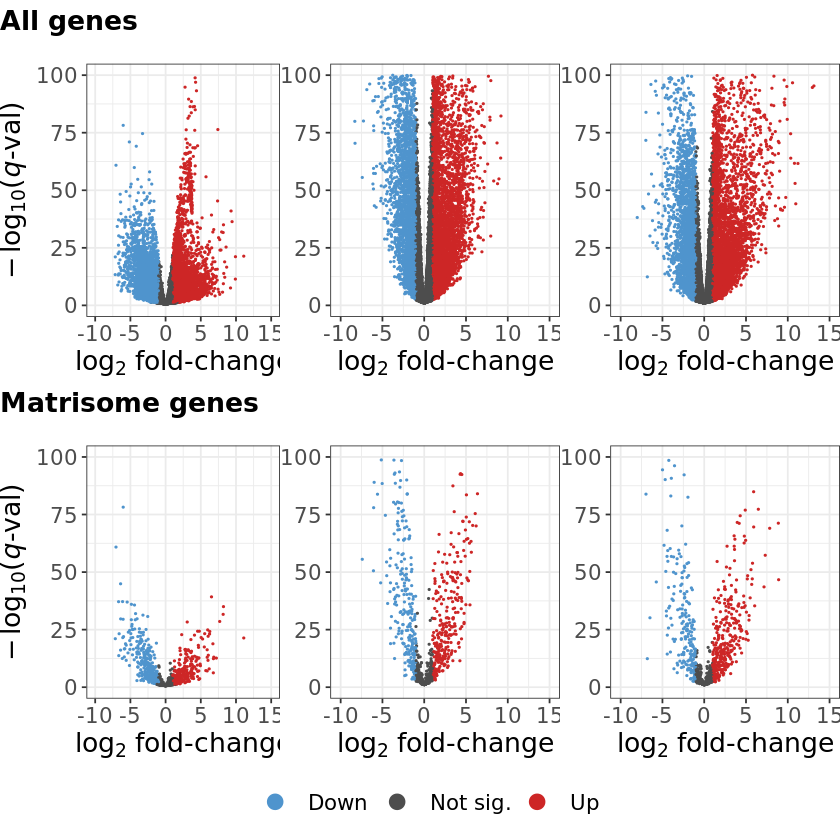

In [8]:
# fig1 <- plot_grid(
# #     plot_grid(NULL, NULL, NULL, ncol = 3, labels = c("Cervical cancer", "Endometrial cancer", "Uterine carcinosarcoma"), label_font_family = family, label_size = text_size, label_fontface = "bold", hjust = 0, vjust = 1.5, label_x = 0.2),
#     plot_grid(NULL, NULL, NULL, ncol = 3, labels = c("CESC", "UCEC", "UCS"), label_font_family = family, label_size = text_size, label_fontface = "bold", hjust = 0, vjust = 1.5, label_x = 0.2),
#     vplot_grid + theme(plot.margin = unit(c(0, 0, 0.25, 0), "cm")),
#     ea_goplots,
#     ncol = 1,
#     rel_heights = c(0.05, 1, 0.75)
# )
# fig1

fig_2 <- plot_grid(vplot_grid)

fig_2

In [9]:
# ggsave(fig1, filename = paste0(dirs$figures_dir, "/paneled/figure1.png"), dpi = dpi, height = fig1_ht, width = fig1_wd)
ggsave(fig_2, filename = paste0(dirs$figures_dir, "/one_off/poster_figure_2.png"), dpi = dpi, height = 6, width = 10)